In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import csv as csv

# /Users/hayatoyamaguchi/Public/kaggle/House Price/house-prices-advanced-regression-techniques

path = "house-prices-advanced-regression-techniques/"
train_df = pd.read_csv(path+"train.csv", header=0)
test_df = pd.read_csv(path+"test.csv", header=0)
train_df['WhatIsData'] = 'Train'
test_df['WhatIsData'] = 'Test'
train_df.tail()

drop_train_df = train_df.drop('SalePrice',axis=1)
allData = pd.concat([drop_train_df,test_df],axis=0)
allData['TotalSF'] = allData['TotalBsmtSF'] + allData['1stFlrSF'] + allData['2ndFlrSF']
print(train_df.shape)
print(drop_train_df.shape)
print(test_df.shape)
print(allData.shape)
allData["LotFrontage"] = allData.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
na_col_list = allData.isnull().sum()[allData.isnull().sum()>0].sort_values(ascending=False).index.tolist()
for row in na_col_list:
    if allData[row].dtypes == "float64":
        allData[row][allData[row].isnull()] = 0
    else:
        allData[row][allData[row].isnull()] = "NA"

dropData = allData[allData.columns[allData.columns != "WhatIsData"]]

data_dummies = pd.get_dummies(dropData)
transdropData = pd.concat([dropData,data_dummies],axis=1)

transdropData = transdropData.select_dtypes(include=["float64","int64","uint8"])
transdropData = transdropData.astype('int')
a = transdropData.select_dtypes(include="object")
print(a.shape)
print(transdropData.shape)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = transdropData.columns.values
transdropData_scaled = pd.DataFrame(scaler.fit(transdropData).transform(transdropData),columns=columns)
print(transdropData_scaled.shape)
print(allData["WhatIsData"].shape)
# transAllData = pd.concat([transdropData_scaled,allData["WhatIsData"]],axis=1)

transdropData_scaled["WhatIsData"] = list(allData["WhatIsData"])
transAllData = transdropData_scaled

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(train_df["SalePrice"])
type(np.log(train_df["SalePrice"][0]))

transAllData2 = transAllData.loc[:,~transAllData.columns.duplicated()]
print(transAllData.shape)
print(transAllData2.shape)

X_train = transAllData2[transAllData2['WhatIsData']=='Train'].drop(['WhatIsData','Id'], axis=1)
y_train = np.log(train_df["SalePrice"])
X_test = transAllData2[transAllData2['WhatIsData']=='Test'].drop(['WhatIsData','Id'], axis=1)

(1460, 82)
(1460, 81)
(1459, 81)
(2919, 82)


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(2919, 0)
(2919, 351)
(2919, 351)
(2919,)
(2919, 352)
(2919, 314)


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

from pylab import rcParams

rcParams['figure.figsize'] = 20,200

ranking = np.argsort(-rf.feature_importances_)
# f, ax = plt.subplots(figsize=(11, 90))
# sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
# ax.set_xlabel("feature importance")
# plt.tight_layout()
# plt.show()

Training done using Random Forest


In [5]:
X_train = X_train.iloc[:,ranking[:37]]
X_test = X_test.iloc[:,ranking[:37]]
X_train["Interaction"] = X_train["TotalSF"]*X_train["OverallQual"]
X_test["Interaction"] = X_test["TotalSF"]*X_test["OverallQual"]
X_train.head()

,OverallQual,TotalSF,GarageCars,GrLivArea,YearBuilt,LotArea,GarageArea,YearRemodAdd,OverallCond,CentralAir_N,...,FullBath,Fireplaces,MSSubClass,SaleCondition_Abnorml,TotRmsAbvGrd,Neighborhood_OldTown,KitchenQual_TA,GarageFinish_Unf,YrSold,Interaction
0,0.646183,0.023361,0.307040,0.413547,1.046258,-0.217879,0.349364,0.896833,-0.507284,-0.26829,...,0.781366,-0.924311,0.067331,-0.263861,0.986849,-0.298629,-1.022521,-0.853371,0.157646,0.015096
1,-0.063185,-0.028762,0.307040,-0.471891,0.154764,-0.072044,-0.058991,-0.395604,2.188279,-0.26829,...,0.781366,0.623632,-0.873616,-0.263861,-0.287758,-0.298629,0.977975,-0.853371,-0.602962,0.001817
2,0.646183,0.197105,0.307040,0.563755,0.980221,0.137197,0.627787,0.848965,-0.507284,-0.26829,...,0.781366,0.623632,0.067331,-0.263861,-0.287758,-0.298629,-1.022521,-0.853371,0.157646,0.127366
3,0.646183,-0.092054,1.619264,0.427382,-1.859351,-0.078385,0.785561,-0.682812,-0.507284,-0.26829,...,-1.027363,0.623632,0.302568,3.789876,0.349546,-0.298629,-1.022521,1.171824,-1.363569,-0.059484
4,1.355551,0.987641,1.619264,1.378042,0.947203,0.518903,1.685798,0.753229,-0.507284,-0.26829,...,0.781366,0.623632,0.067331,-0.263861,1.624153,-0.298629,-1.022521,-0.853371,0.157646,1.338798


Training done using Random Forest


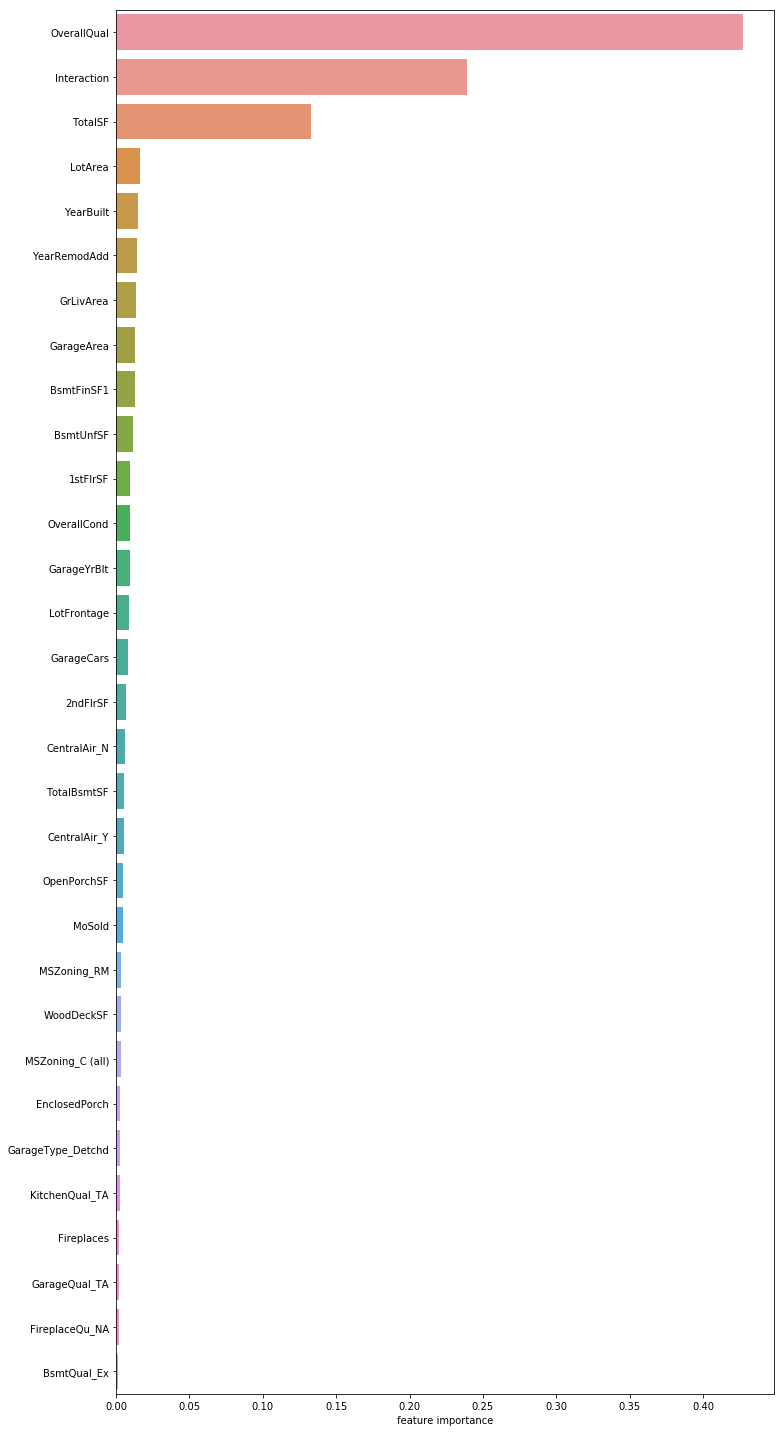

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

# from pylab import rcParams

# rcParams['figure.figsize'] = 20,200

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 20))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

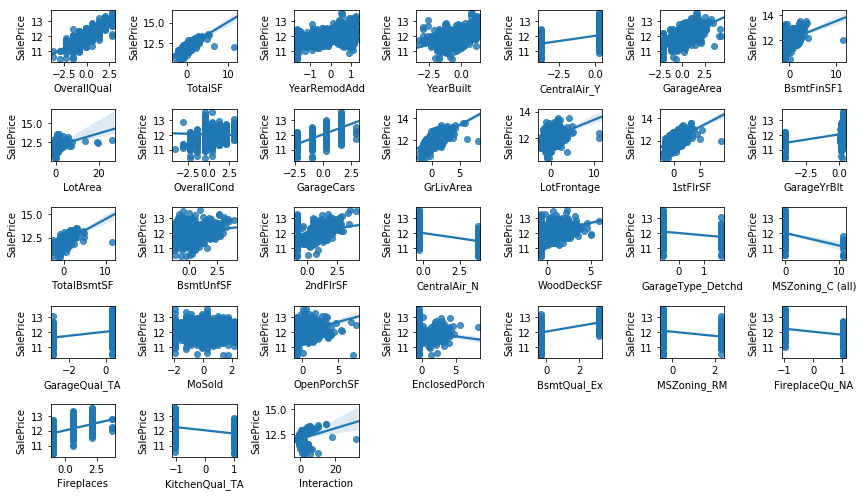

In [17]:
fig = plt.figure(figsize=(12,7))
for i in np.arange(31):
    ax = fig.add_subplot(5,7,i+1)
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

In [6]:
Xmat = X_train
Xmat['SalePrice'] = y_train
Xmat = Xmat.drop(Xmat[(Xmat['TotalSF']>5) & (Xmat['SalePrice']<12.5)].index)
Xmat = Xmat.drop(Xmat[(Xmat['GrLivArea']>5) & (Xmat['SalePrice']<13)].index)

# recover
y_train = Xmat['SalePrice']
X_train = Xmat.drop(['SalePrice'], axis=1)

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


parameters = {
#         'n_estimators'      : [100,300,1000],
        'min_samples_split' : [6,7,8],
        'max_depth'         : [5, 10, 15,20,25,30]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=0,n_estimators=1000), parameters,cv = 5)
grid_search.fit(X_train, y_train)

NameError: name 'X_train' is not defined

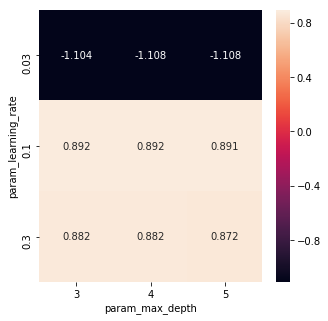

In [50]:
def plot_heatmap_from_grid(grid):
    # チューニング対象のパラメータを特定する。
    params = [k for k in grid.cv_results_.keys() if k.startswith('param_')]
    if len(params) != 2: raise Exception('grid has to have exact 2 parameters.') 

    # ヒートマップの行、列、値に使うキーを定義する。
    index = params[0]
    columns = params[1]
    values = 'mean_test_score'

    # gridから必要なキーのみを抽出する。
    df_dict = {k: grid.cv_results_[k] for k in grid.cv_results_.keys() & {index, columns, values}}
    rcParams['figure.figsize'] = 5,5
    # dictをDataFrameに変換してseabornでヒートマップを表示する。
    import pandas as pd
    df = pd.DataFrame(df_dict)
    data = df.pivot(index=index, columns=columns, values=values)
    import seaborn as sns
    sns.heatmap(data, annot=True, fmt='.3f')
plot_heatmap_from_grid(grid_search)

In [54]:
from sklearn.model_selection import train_test_split
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train,y_train, random_state=0)
import xgboost as xgb
model = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree =0.6)
model.fit(X_train_train,y_train_train)
print(model.score(X_train_train,y_train_train))
print(model.score(X_val,y_val))
print(X_train_train.shape)
print(y_train_train.shape)

0.9552774944162749
0.896508368781389
(1095, 38)
(1095,)


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [1]:
from sklearn.model_selection import train_test_split
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train,y_train, random_state=0)
import xgboost as xgb
epochs = [100,200,300,400,500,600,700,800,900,1000,1095]
train_scores = []
test_scores = []
for epoch in epochs:
    model = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree=0.6)
    X_train_epoch = X_train_train[:epoch]
    y_train_epoch = y_train_train[:epoch]
#     print(X_train_epoch.shape)
#     print(y_train_epoch.shape)
    model.fit(X_train_epoch,y_train_epoch)
#     print(forest.score(X_train_epoch,y_train_epoch))
#     print(forest.score(X_val,y_val))
    train_scores.append(model.score(X_train_epoch,y_train_epoch))
    test_scores.append(model.score(X_val,y_val))
import matplotlib.pyplot as plt
%matplotlib inline
x = epochs
y0 = train_scores
y1 = test_scores
fig = plt.figure()
plt.xlabel('epoch')
plt.plot(x, y0, label='train_scores')
plt.plot(x, y1, label='test_scores')
plt.legend()
plt.show()

NameError: name 'X_train' is not defined

In [7]:
from datetime import datetime
time= datetime.now().strftime("%Y%m%d-%H%M%S")
time
import xgboost as xgb
model = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree=0.6)
model.fit(X_train,y_train)
predictions = np.exp(model.predict(X_test))

df_result = pd.DataFrame()
df_result['Id'] = test_df['Id']
df_result['SalePrice'] = predictions
df_result.to_csv('result.csv'+time,index=False)
df_result

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


,Id,SalePrice
0,1461,127712.984375
1,1462,161433.562500
2,1463,189686.265625
3,1464,189850.593750
4,1465,185281.406250
5,1466,168555.093750
6,1467,172496.656250
7,1468,167714.734375
8,1469,186714.109375
9,1470,124011.242188


In [56]:
X_test.shape

(1459, 38)

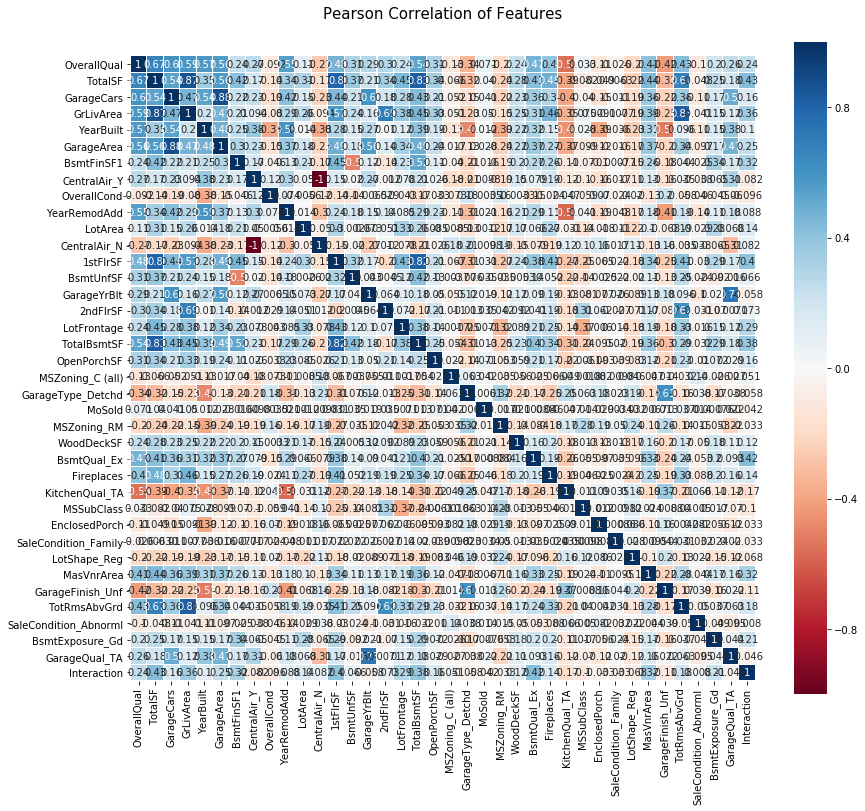

In [59]:
colormap = plt.cm.RdBu

from pylab import rcParams
rcParams['figure.figsize'] = 30,30

plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)